In [38]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import os


#Feel free to delete these if you don't want to install them all right away
from sklearn.linear_model import TweedieRegressor
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm


from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, make_scorer, roc_auc_score, log_loss, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from collections import Counter


#Change this to whereever you save your stuff
os.chdir("C:\ASNA_Case_Comp")


<>:28: SyntaxWarning: invalid escape sequence '\A'
<>:28: SyntaxWarning: invalid escape sequence '\A'
C:\Users\graha\AppData\Local\Temp\ipykernel_27544\1921868676.py:28: SyntaxWarning: invalid escape sequence '\A'
  os.chdir("C:\ASNA_Case_Comp")


In [ ]:
#Read in dataset
dat = pd.read_excel("Dataset.xlsx")
dat_one_hot = pd.read_csv("cleanData.csv",header=0)

#Add a column for has claim
dat_one_hot['has_claim'] = dat_one_hot['claim_id'].apply(lambda x: 1 if x !=0 else 0)

count = 0
for row in dat_one_hot['has_claim']:
    if row > 0:
        count+=1
print(count)
#There is this many total claims out of 10000 students

1819


# EDA on variables

In [23]:
#Number of people
print(len(dat['name'].unique()))
print(len(dat['student_id'].unique()))
print(len(dat['gpa'].unique()))

9955
10000
10000


Note the strange difference above, there seems to be more unique gpa values then actual people in the dataset, may be some minor cleaning needed.

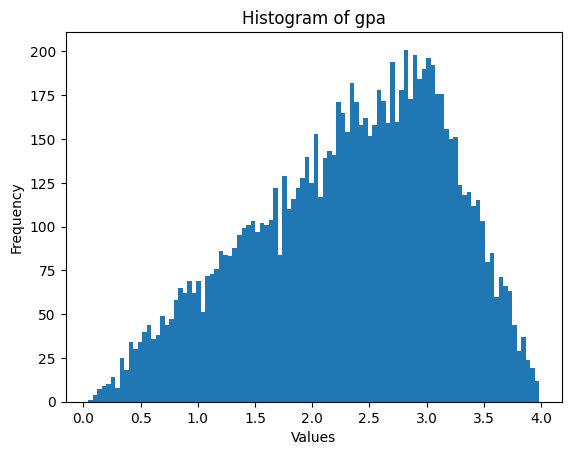

In [5]:
#Just subsetting first 8 cols to view the stats of the people
#gpa's
dat_subset = dat_one_hot.iloc[:, :5]
name_unique = dat_subset.drop_duplicates(subset='gpa')
plt.hist(name_unique['gpa'], bins=100)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of gpa")
plt.show()

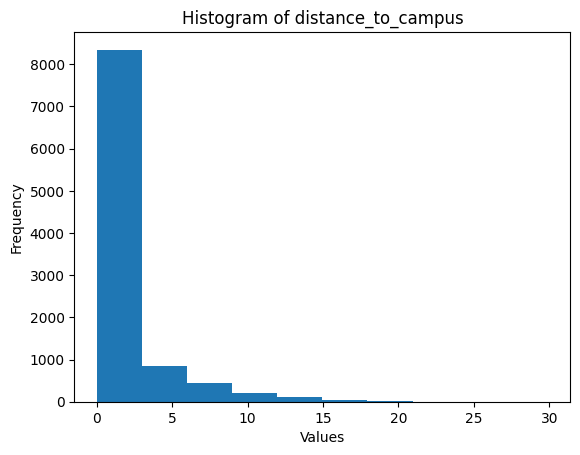

In [6]:
plt.hist(name_unique['distance_to_campus'], bins=10)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of distance_to_campus")
plt.show()

In [7]:
#Types of insurance
print(dat['coverage'].unique())

['Additional Living Expense' 'Guest Medical' 'Liability'
 'Personal Property']


In [8]:
#Types of study
print(dat['study'].unique())

['Humanities' 'Science' 'Business' 'Other']


In [9]:
#Level of study
print(dat['class'].unique())

['Junior' 'Senior' 'Sophomore' 'Freshman' 'Grad student']


[2 3 1]


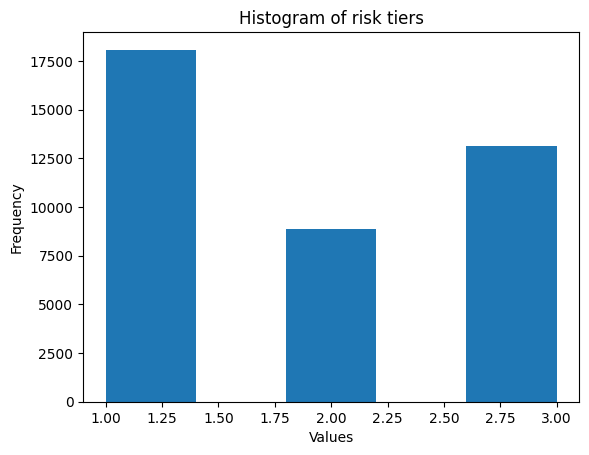

In [10]:
#risk tiers
print(dat['risk_tier'].unique())

plt.hist(dat['risk_tier'], bins=5)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of risk tiers")
plt.show()

In [11]:
#Claim id's
print(dat['claim_id'].unique())
print(len(dat['claim_id'].unique()))

[   0    1    2 ... 1817 1818 1819]
1820


[   0.         990.5963911 1172.942616  ... 4040.891836   940.1653337
 4412.484522 ]
1820


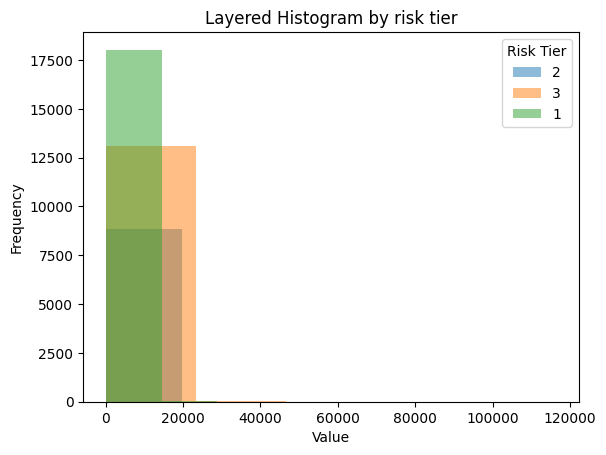

In [12]:
#Amount
print(dat['amount'].unique())
print(len(dat['amount'].unique()))

groups = dat['risk_tier'].unique()

for g in groups:
    subset = dat[dat['risk_tier'] == g]['amount']
    plt.hist(subset, bins=5, alpha=0.5, label=str(g))

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(title="Risk Tier")
plt.title("Layered Histogram by risk tier")
plt.show()

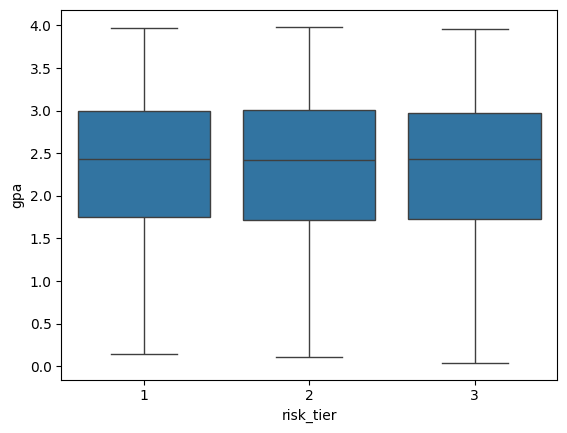

In [15]:
sns.boxplot(data = dat[['gpa','risk_tier']], x = 'risk_tier',y = 'gpa')
plt.show()
#No real difference in risk tiers for different gpa's


In [21]:
combinations = list(zip(dat['coverage'], dat['risk_tier']))
combination_counts = Counter(combinations)
for item, count in combination_counts.items():
    print(f'{item}: {count}')

('Additional Living Expense', 2): 2211
('Guest Medical', 2): 2209
('Liability', 2): 2209
('Personal Property', 2): 2221
('Additional Living Expense', 3): 3286
('Guest Medical', 3): 3281
('Liability', 3): 3279
('Personal Property', 3): 3292
('Additional Living Expense', 1): 4519
('Guest Medical', 1): 4514
('Liability', 1): 4512
('Personal Property', 1): 4538


In [49]:
#Trying to run a basic linear model on everything
#use train_test_split to split data
y = dat_one_hot['has_claim']
#X = dat_one_hot.drop(columns=['student_id','claim_id','amount','distance_to_campus','holdout'])
X = dat_one_hot[['gpa','greek','off_campus','sprinklered','GMale','GFemale','GOther']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


# Create and fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.189379
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              has_claim   No. Observations:                32056
Model:                          Logit   Df Residuals:                    32049
Method:                           MLE   Df Model:                            6
Date:                Fri, 21 Nov 2025   Pseudo R-squ.:                -0.01745
Time:                        22:45:47   Log-Likelihood:                -6070.7
converged:                       True   LL-Null:                       -5966.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
gpa            -0.4473      0.023    -19.162      0.000      -0.493      -0.402
greek           0.6365    